In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/colab/python basic/누구나_파이썬_통계분석/dataset/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 4.1 모집단과 표본

- 모집단: 추측하고 싶은 관측 대상 전체
- 표본: 추측에 사용하는 관측 대상의 일부분
- 표본추출: 모집단에서 표보을 골라내는 일
- 표본크기: 골라낸 표본의 수(샘플 사이즈)
- 표본 통계량: 표본을 바탕으로 계산한 평균이나 분산, 상관계수
- 모수: 모집단의 평균이나 분산, 상관계수

#### 4.1.1 표본추출 방법

- 무작위 추출: 임의로 표본을 추출하는 방법
- 복원 추출: 여러 차례 동일한 표본을 선택하는 추출 방법
- 비복원 추출: 동일한 표본은 한 번만 선택하는 방법

In [3]:
# 무작위 추출
np.random.choice([1,2,3],3)

array([1, 2, 2])

In [4]:
# 비복원 추출
np.random.choice([1,2,3],3, replace = False)

array([2, 1, 3])

In [5]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [7]:
scores.mean()

69.530

In [9]:
for i in range(5):
  sample = np.random.choice(scores, 20)
  print(f'{i+1}번째 무작위 추출로 얻은 표본 평균', sample.mean())

1번째 무작위 추출로 얻은 표본 평균 72.45
2번째 무작위 추출로 얻은 표본 평균 63.7
3번째 무작위 추출로 얻은 표본 평균 66.05
4번째 무작위 추출로 얻은 표본 평균 71.7
5번째 무작위 추출로 얻은 표본 평균 74.15


## 4.2 확률 모형

#### 4.2.1 확률의 기본

- 확률 변수: 결과를 알아맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
- 시행: 확률변수의 결과를 관측하는 것
- 사건: 시행 결과로 나타날 수 있는 일
- 근원사건: 더 세부적으로 분해할 수 없는 사건
- 상호 배반: 동시에 사건이 일어날 수 없음

#### 4.2.2 확률분포
확률변수가 어떻게 움직이는지를 나타낸 것

In [10]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [11]:
np.random.choice(dice, p = prob)

1

In [12]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [13]:
freq, _ = np.histogram(sample, bins = 6, range = (1, 7))
pd.DataFrame({'frequency': freq,
              'relative frequency': freq / num_trial},
             index = pd.Index(np.arange(1, 7), name = 'dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


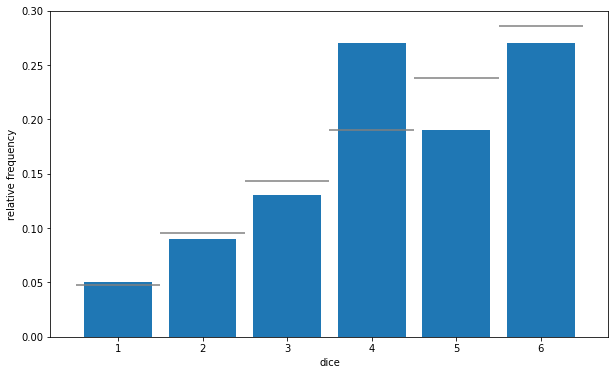

In [14]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins = 6, range = (1, 7), density = True, rwidth = 0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors = 'gray')
# 막대그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

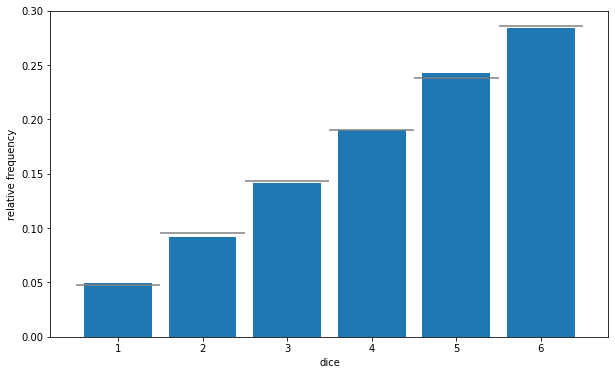

In [15]:
num_trial = 10000
sample = np.random.choice(dice, size = num_trial, p = prob)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins = 6, range = (1, 7), density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors = 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 추측통계의 확률

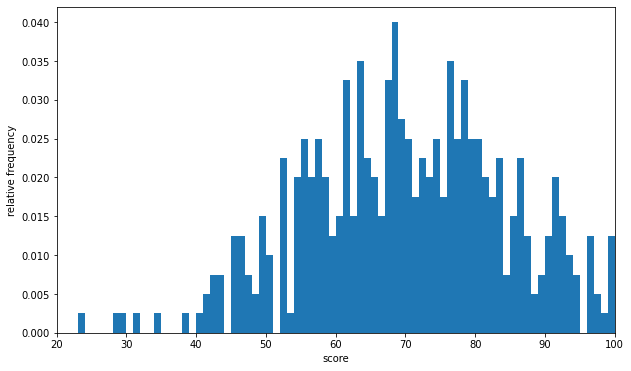

In [17]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins = 100, range = (0, 100), density = True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [18]:
np.random.choice(scores)

89

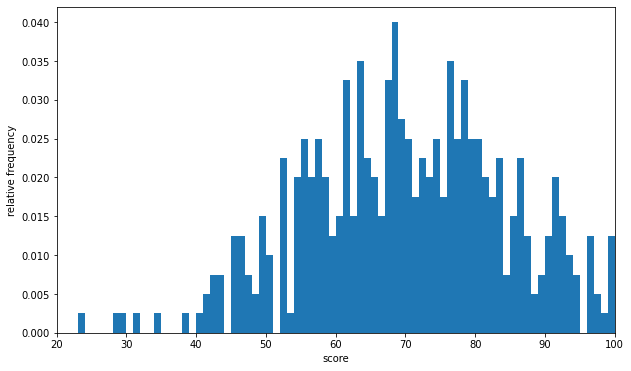

In [19]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins = 100, range = (0, 100), density = True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

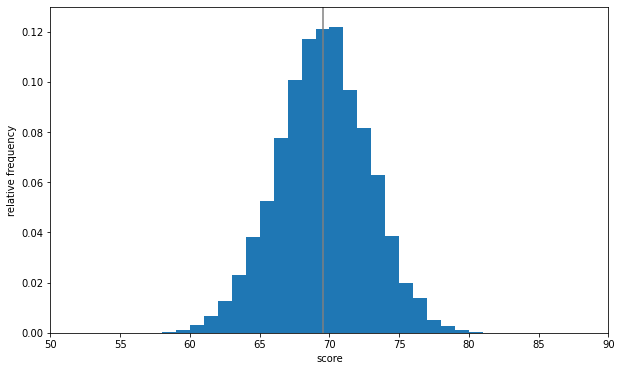

In [21]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins = 100, range = (0, 100), density = True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()